<a href="https://colab.research.google.com/github/KavanMehtaCS/MNIST-Digits-Classification/blob/main/MNIST_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 1: Digits Classification using a Neural Network**

*   **Problem Statement**: Automatic classification of digits from 0-9 using a neural network.
*  This project uses 60,000 28 by 28 pixel digit images for training the neural network. A neural network is a network of fully connected sets of neurons that each use activation functions (translating non-linear data into linear data) and different weights and biases to compute an output.
*   First of all, the neurons are set to random weights with random biases.
Then, the neural network uses the method of backpropagation and gradient
descent to learn from its past classification mistakes every time it creates a prediction.
*   Backpropagation is the process of using the training loss and adjusting the weights and biases by the value of gradient descent, multiplied with the model’s learning rate. Lastly, the model made classifications on a testing set of 10,000 images and was able to reach a 97.8% accuracy.
*   The project can be useful to recognize handwritten digits in checks, accounting, and even historical documents.

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras import utils as np_utils

np.random.seed(0)

## Data

This code block imports the MNIST Data Set and loads the traing and testing data. Then, it prints out the shape of the training set and the testing set. This represents 60,000 28 by 28 pixel images for training and 10,000 28 by 28 pixel images for testing.

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize Examples

Here, there are ten classes, each one for digits from 0-9 (inclusive). We use the Mathplot library to create 10 different subplots for each of the seperate classes. It uses a loop to iterate and find the first example of each of the different digits in the traing data set. Then, it provides the label of the digit and shows the images in the subplots.

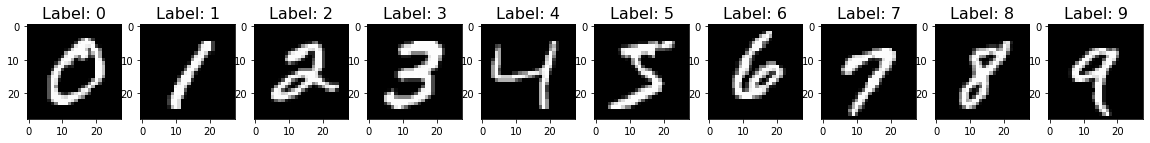

In [ ]:
num_classes = 10
f, x = plt.subplots(1, num_classes, figsize = (20,20))

for i in range (0, num_classes):
    sample = x_train[y_train == i][0]
    x[i].imshow(sample, cmap = 'gray')
    x[i].set_title("Label: {}".format(i), fontsize = 16)


In [ ]:
for i in range(10):
  print(y_train[i])
#This is just showing where the first representation of the digit is in the training set

5
0
4
1
9
2
1
3
1
4


In [ ]:
#One-hot coding
#Provides 0 for all the other classes except the correct digit class for the training data set.
#The correct digit class is represented by a 1 indicating true at that specific index in the array.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare data


The normalization of data is done to get values between 0 and 1. Since the pixel value of the colors (RGB) of images are in the range of 0 to 255, we divide by 255. We reshape the data to flatten the 28 by 28 pixel grid into a one-dimensional vector consisting of 784 values for each pixel.

In [ ]:
#normalize data
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
#Reshape data
print(x_train[0].shape)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(28, 28)
(60000, 784)


# Fully Connected Neural Network Model

##Breaking Down The Neural Network!

Before we dive into any code lets break down how a neural network works and what it does.

![alt text](http://www.extremetech.com/wp-content/uploads/2015/07/NeuralNetwork.png)
*Figure 1*




###Layers
As we mentioned earlier each neural network consists of multiple layers. At each layer a different transformation of data occurs. Our initial input data is fed through the layers and eventually arrives at the output layer where we will obtain the result.
####Input Layer
The input layer is the layer that our initial data is passed to. It is the first layer in our neural network.
####Output Layer
The output layer is the layer that we will retrive our results from. Once the data has passed through all other layers it will arrive here.
####Hidden Layer(s)
All the other layers in our neural network are called "hidden layers". This is because they are hidden to us, we cannot observe them. Most neural networks consist of at least one hidden layer but can have an unlimited amount. Typically, the more complex the model the more hidden layers.
####Neurons
Each layer is made up of what are called neurons. Neurons have a few different properties that we will discuss later. The important aspect to understand now is that each neuron is responsible for generating/holding/passing ONE numeric value.

This means that in the case of our input layer it will have as many neurons as we have input information. For example, say we want to pass an image that is 28x28 pixels, thats 784 pixels. We would need 784 neurons in our input layer to capture each of these pixels.

This also means that our output layer will have as many neurons as we have output information. The output is a little more complicated to understand so I'll refrain from an example right now but hopefully you're getting the idea.

But what about our hidden layers? Well these have as many neurons as we decide. We'll discuss how we can pick these values later but understand a hidden layer can have any number of neurons.
####Connected Layers
So how are all these layers connected? Well the neurons in one layer will be connected to neurons in the subsequent layer. However, the neurons can be connected in a variety of different ways.

Take for example *Figure 1* (look above). Each neuron in one layer is connected to every neuron in the next layer. This is called a **dense** layer. There are many other ways of connecting layers but well discuss those as we see them.



###Activation Function
Activation functions are simply a function that is applied to the weighed sum of a neuron. They can be anything we want but are typically higher order/degree functions that aim to add a higher dimension to our data. We would want to do this to introduce more comolexity to our model. By transforming our data to a higher dimension, we can typically make better, more complex predictions.

A list of some common activation functions and their graphs can be seen below.

- Relu (Rectified Linear Unit)

![alt text](https://yashuseth.files.wordpress.com/2018/02/relu-function.png?w=309&h=274)
- Tanh (Hyperbolic Tangent)

![alt text](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)
- Sigmoid

![alt text](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)



###Backpropagation
Backpropagation is the fundemental algorithm behind training neural networks. It is what changes the weights and biases of our network. It functions through a cost/loss function.

####Loss/Cost Function
The neural network feeds information through the layers until it eventually reaches an output layer. This layer contains the results that we look at to determine the prediciton from our network. In the training phase it is likely that our network will make many mistakes and poor predicitions. In fact, at the start of training our network doesn't know anything (it has random weights and biases)!

We need some way of evaluating if the network is doing well and how well it is doing. For our training data we have the features (input) and the labels (expected output), because of this we can compare the output from our network to the expected output. Based on the difference between these values we can determine if our network has done a good job or poor job. If the network has done a good job, we'll make minor changes to the weights and biases. If it has done a poor job our changes may be more drastic.

So, this is where the cost/loss function comes in. This function is responsible for determining how well the network did. We pass it the output and the expected output, and it returns to us some value representing the cost/loss of the network. This effectively makes the networks job to optimize this cost function, trying to make it as low as possible.

Some common loss/cost functions include.
- Mean Squared Error
- Mean Absolute Error
- Hinge Loss

####Gradient Descent
Gradient descent and backpropagation are closely related. Gradient descent is the algorithm used to find the optimal paramaters (weights and biases) for our network, while backpropagation is the process of calculating the gradient that is used in the gradient descent step.

Gradient descent requires some pretty advanced calculus and linear algebra to understand so we'll stay away from that for now. Let's just read the formal definition for now.

"Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model." (https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

![alt text](https://cdn-images-1.medium.com/max/1000/1*iU1QCnSTKrDjIPjSAENLuQ.png)



We use the ReLU activation function. There are 128 neurons each in 2 densely connected layers. We use a dropout to deactivate 25% of the neurons to prevent overfitting to the training data. The Last dense layer is for the classifier and as we have 10 different digits, we would have 1 neuron for each digit. It uses a softmax function which assigns a probability to each different digit class in terms of its match with the actual image. Categorical crossentropy is a loss function that is used in multi-class classification tasks and is used to quantify the difference between two probability distributions. The Adam optimizer is a very standard optimizer that uses stochastic gradient descent for training deep learning models.

In [ ]:
#Model - Fully connected neural network
model = Sequential()

model.add(Dense(units = 128, input_shape = (784, ), activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25)) #Prevents overfitting
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Train

In [ ]:
#Train
batch_size = 512
epochs = 10
model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/10
118/118 [==============================] - 3s 6ms/step - loss: 0.5899 - accuracy: 0.8305
Epoch 2/10
118/118 [==============================] - 1s 5ms/step - loss: 0.2227 - accuracy: 0.9358
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1610 - accuracy: 0.9522
Epoch 4/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1263 - accuracy: 0.9628
Epoch 5/10
118/118 [==============================] - 1s 5ms/step - loss: 0.1045 - accuracy: 0.9692
Epoch 6/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0908 - accuracy: 0.9728
Epoch 7/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0770 - accuracy: 0.9767
Epoch 8/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0673 - accuracy: 0.9798
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0591 - accuracy: 0.9821
Epoch 10/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0509 - accuracy: 0.9850

# Evaluate

In [ ]:
#Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 4ms/step - loss: 0.0768 - accuracy: 0.9773
Test Loss: 0.07682613283395767, Test Accuracy: 0.9772999882698059


In [ ]:
#Predicting on all the test cases
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
print(y_pred)
print(y_pred_classes)

[[4.39099239e-07 2.25180784e-07 3.82968938e-06 ... 9.99967456e-01
  1.11399245e-07 3.64172456e-06]
 [1.14112254e-06 6.68928187e-05 9.99331892e-01 ... 2.62980308e-07
  8.20145033e-06 3.84721499e-09]
 [9.51304719e-06 9.94942963e-01 6.47751789e-04 ... 1.64348795e-03
  1.47762347e-03 9.31504655e-06]
 ...
 [3.16928955e-10 1.03206750e-08 2.50365478e-10 ... 7.13582131e-06
  4.92754054e-07 3.84324194e-05]
 [2.85972817e-07 4.51015936e-08 1.70182901e-09 ... 6.87458490e-09
  2.40211753e-04 9.93165230e-08]
 [2.24976322e-08 2.16285097e-11 6.61986077e-10 ... 9.28521257e-13
  5.87765170e-09 1.51590095e-11]]
[7 2 1 ... 4 5 6]


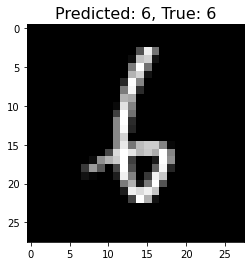

In [ ]:
#Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_classes = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_classes, y_sample_true), fontsize = 16)
plt.imshow(x_sample.reshape(28, 28), cmap = 'gray')

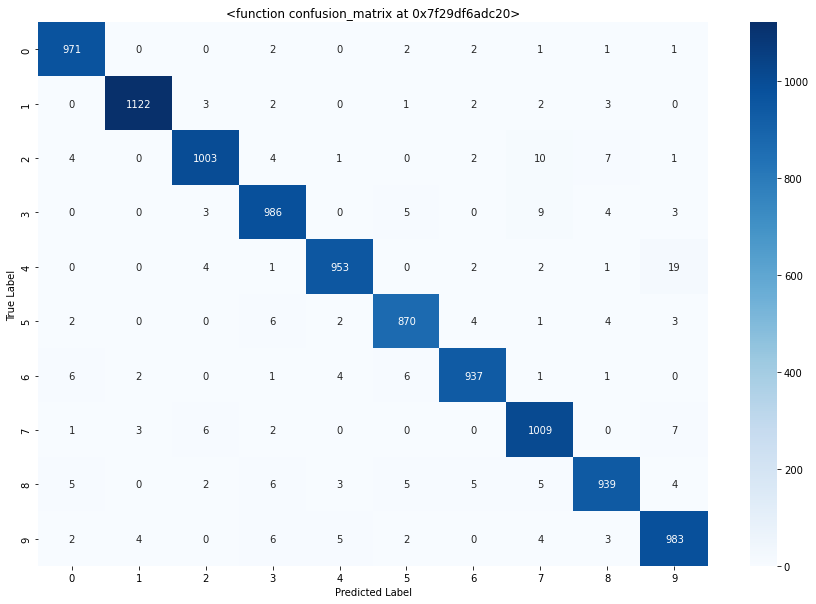

In [ ]:
#Confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#Plot (Meaning: Consider predicted label as x axis and true label as y axis, shows all predictions for all the different digits)
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(confusion_mtx, annot = True, fmt = 'd', ax = ax, cmap = 'Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title(confusion_matrix);

In [ ]:
#Investigating errors
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [ ]:
#find where model is least sure about a number
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones


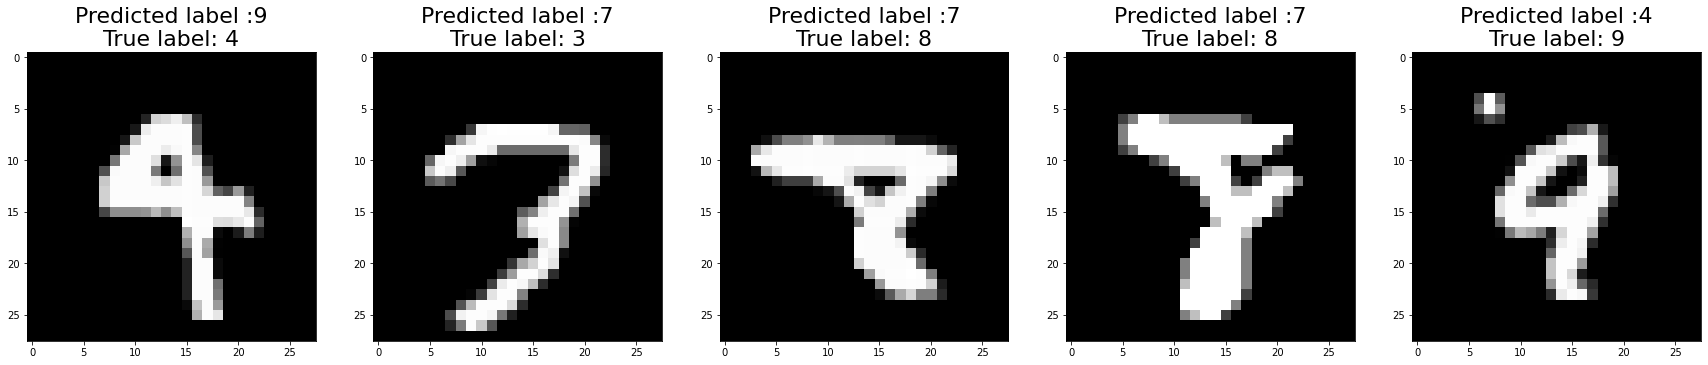

In [ ]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)